In [36]:
import pandas as pd
import numpy as np
import copy
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re, joblib
import konlpy
from konlpy.tag import Okt 
okt = Okt()
import string
import threading

In [4]:
os.chdir('G:\내 드라이브\제주_전기차\data')

In [6]:
df_news = pd.read_csv('CFI전기차보도자료.csv')

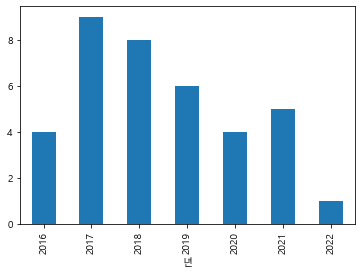

In [44]:
df_news[df_news.제목.str.contains('충전')].groupby(['년']).제목.count().plot.bar()
plt.savefig('G:\내 드라이브\제주_전기차\시각화분석자료\충전관련 정책 빈도수1.png')

,제목,날짜,월,년
2,<23일 0시 이후 보도 가능>전기차 충전시설 설치의무 강화 및 충전방해행위 단속 ...,2022-01-21,1,2022
3,"제주 전기차충전서비스 규제 특구, 4개 분야 모두 임시허가 쾌거",2021-11-04,11,2021
5,<9월 26일 0시 이후 보도 가능> 전기차 충전서비스 규제특구 신사업으로 시장 조...,2021-09-24,9,2021
6,"제주도, 올해 상반기 공용전기차 충전기 정기점검 실시",2021-06-02,6,2021
10,"전기차 선도도시 제주, 충전인프라 고도화·배터리 진단서비스 실증 착수",2021-01-21,1,2021
11,전기차 충전방해행위 자동 단속으로 충전불편 해소한다,2021-01-12,1,2021
12,전기차 개방형 충전기 관리 강화 위한 정책 회의 개최,2020-11-02,11,2020
20,제주 도심권에 전기차 10대 동시충전 신개념 충전소 탄생,2020-06-10,6,2020
22,"道, 교통약자 배려 전기차 충전소로 충전복지 구현",2020-04-09,4,2020
25,"도, 민간 전기차 충전사업자 활성화 사업 추진",2020-03-10,3,2020


In [38]:
df_news

,제목,날짜,월,년
0,"2022년, 바람으로 달리는 전기차 3만대 시대 열린다",2022-02-09,2,2022
1,"<2월 2일 0시 이후 보도 가능>전기차 보급확산 정책, ‘2022년 고용영향평가제...",2022-01-28,1,2022
2,<23일 0시 이후 보도 가능>전기차 충전시설 설치의무 강화 및 충전방해행위 단속 ...,2022-01-21,1,2022
3,"제주 전기차충전서비스 규제 특구, 4개 분야 모두 임시허가 쾌거",2021-11-04,11,2021
4,"제주도, 전기차 운행 안전교육 온라인 실시",2021-10-25,10,2021
...,...,...,...,...
114,"제주특별자치도 전기차 보급정책, 정부도 인정했다",2015-11-17,11,2015
115,"제주도, 전국 최초 전기차 육성 중장기 로드맵 확정",2015-09-16,9,2015
116,전기차 보급 촉진과 이용 활성화를 위한 제도적 근거 마련됐다.,2015-08-19,8,2015
117,"2015년 전기차 1,483대 보급 도민공모에 3,300여명 몰려",2015-03-23,3,2015
